In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# Find anatomical domains

In [2]:
from wsidata import open_wsi
import lazyslide as zs

/Users/eabila/workspace/clones/LazySlide/.venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/eabila/workspace/clones/LazySlide/.venv/lib/python3.12/site-packages/timm/models/hub.py:4: FutureWarning: Importing from timm.models.hub is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


We've saved the spatialdata on the disk previously, lazyslide will try to reload it when you open the slide again

In [3]:
wsi = open_wsi("GTEX-11ZUS-2026.svs")

/Users/eabila/workspace/clones/LazySlide/.venv/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Run preprocess and feature extraction

In [8]:
zs.pp.find_tissues(wsi)
zs.pp.tile_tissues(wsi, 256, mpp=0.5)
zs.tl.feature_extraction(wsi, "resnet50", device="mps")

/Users/eabila/workspace/clones/LazySlide/.venv/lib/python3.12/site-packages/spatialdata/_core/_elements.py:105: UserWarning: Key `tissues` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/eabila/workspace/clones/LazySlide/.venv/lib/python3.12/site-packages/spatialdata/_core/_elements.py:105: UserWarning: Key `tiles` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


Output()

/Users/eabila/workspace/clones/LazySlide/.venv/lib/python3.12/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `resnet50_tiles` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [16]:
zs.tl.spatial_domain(wsi, "resnet50", resolution=0.3)

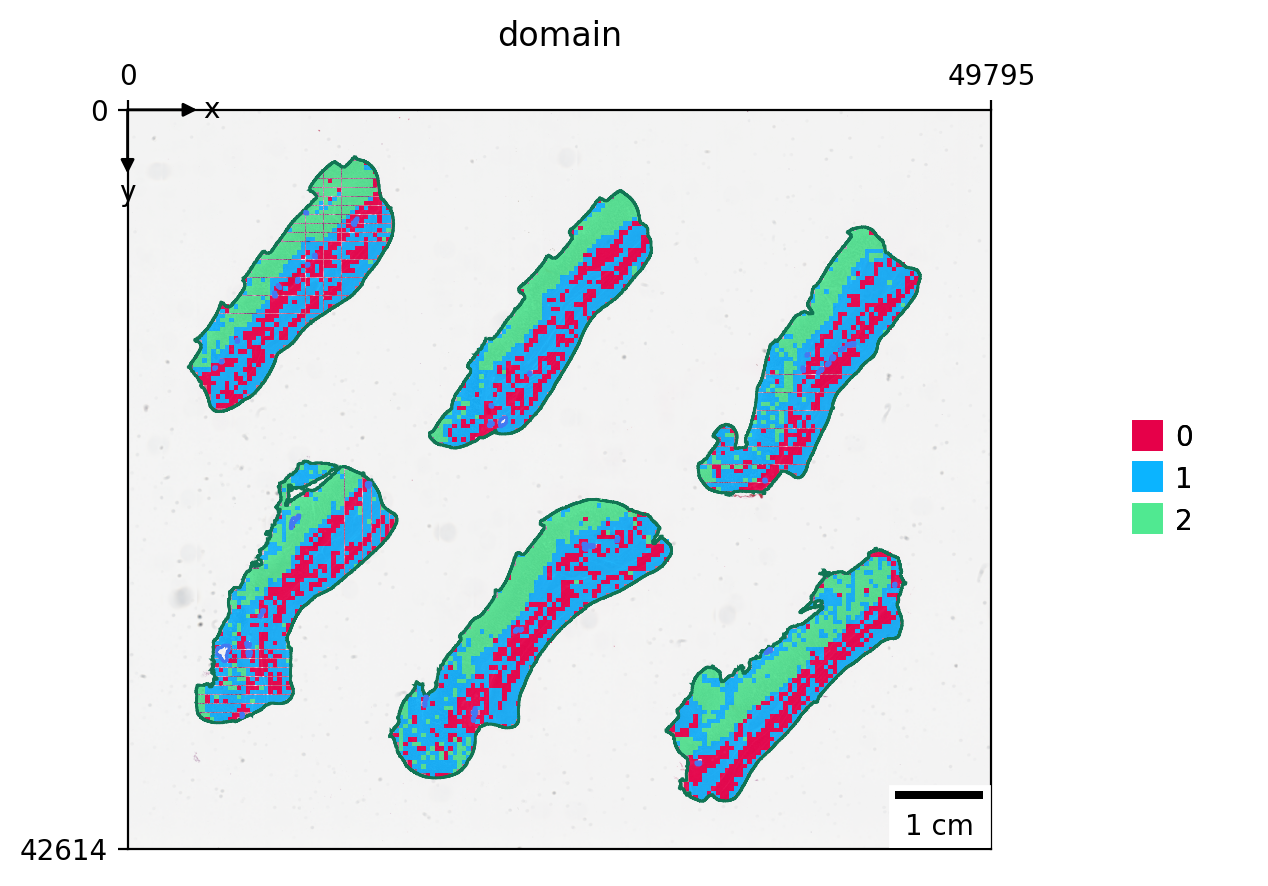

In [17]:
zs.pl.tiles(wsi, color="domain")

## UTAG

[UTAG](https://doi.org/10.1038/s41592-022-01657-2) is a method develop to discovery spatial domain with unsupervised learning

### Tile Graph Building

In [18]:
zs.pp.tile_graph(wsi)

### Create UTAG features

In [19]:
zs.tl.feature_utag(wsi, "resnet50")

### Run spatial domain using UTAG features

In [22]:
zs.tl.spatial_domain(wsi, "resnet50", layer="utag", resolution=0.3)

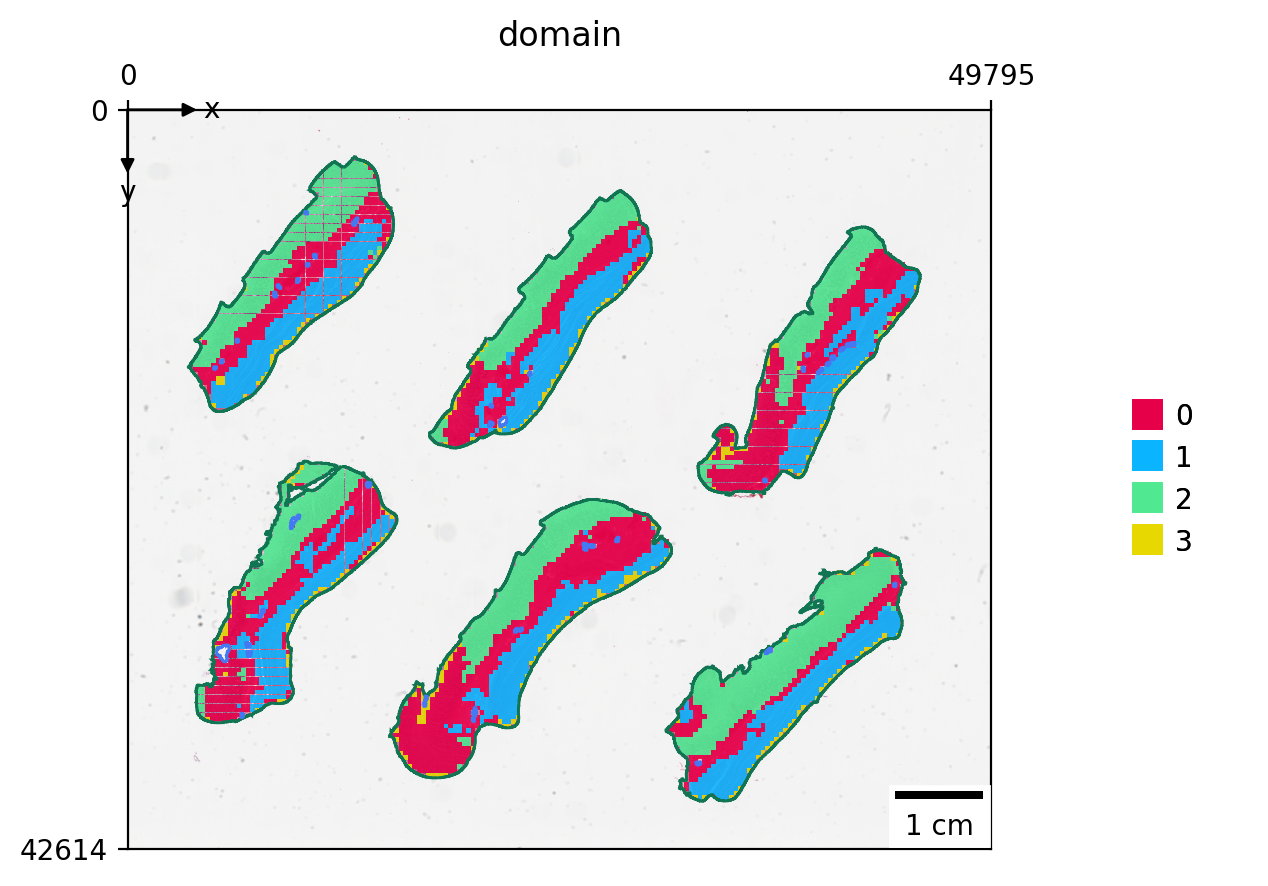

In [23]:
zs.pl.tiles(wsi, color="domain")